<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/Laboratorio%201/MINE4210_ADL_2024_Lab1_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo ADL](https://github.com/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/logo_adl.png?raw=true)


# **Laboratorio 1 - Sesión 2**
## **Introducción a pipelines y búsqueda de hiperparámetros**

## **Tabla de Contenido**

[Contexto y objetivos.](#scrollTo=uGH410ZnYILV&line=13&uniqifier=1)<br>
[0. Importación de librerías.](#scrollTo=y1pFEFR1_-2V&line=1&uniqifier=1)<br>
[1. Entendimiento de los datos.](#scrollTo=9O1de2GRA1f2&line=1&uniqifier=1)<br>
[2. Preparación.](#scrollTo=8ADZzDfHCUQ5&line=1&uniqifier=1)<br>
[3. Modelamiento.](#scrollTo=LiL9RIh1EXe7&line=1&uniqifier=1)<br>
[4. Evaluación.](#scrollTo=NxWp2JgslY1x&line=1&uniqifier=1)<br>




**Tutores**
- Fabián Camilo Castellanos.
- Nicolás Tibatá Castañeda.

## Contexto y objetivos

**Problema**
- En este problema se busca clasificar diferentes imagenes de animales, aplicando pipelines y búsqueda de hiperparámetros.

**Objetivos**
1. Introducción al uso de Pipelines de procesamiento de datos
2. Entrenamiento de redes neuronales profundas.
3. Tuneo y búsqueda de múltiples hiperparámetros.

**Datos**

Los datos los puedes consultar [aquí](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17).

## 0. Importación de librerías

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
!pip install keras-tuner -q
!pip install kaggle -q
!pip install scikeras -q
# El '-q' hace referencia a 'quiet'. Por lo tanto el output de los paquetes no se muestra completo

  Preparing metadata (setup.py) ... done


Para este ejercicio, utilizaremos las siguientes librerías.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder

import tensorflow as tf
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense, Input

## 1. Entendimiento de los datos

En astronomía, la clasificación estelar es la clasificación de las estrellas basada en sus características espectrales. El esquema de clasificación de galaxias, cuásares y estrellas es uno de los más fundamentales de la astronomía. La temprana catalogación de las estrellas y su distribución en el cielo ha permitido comprender que componen nuestra propia galaxia y, tras la distinción de que Andrómeda era una galaxia separada de la nuestra, se empezaron a estudiar numerosas galaxias a medida que se construían telescopios más potentes.

Además, El negocio nos ha bridado el siguiente diccionario de datos:

|Column Name|Description|
|---|---|
obj_ID | Identificador de objeto, el valor único que identifica al objeto en el catálogo de imágenes utilizado por el CAS
alpha | Ángulo de Ascensión Recta (en la época J2000)
delta | Ángulo de declinación (en la época J2000)
u | Filtro ultravioleta en el sistema fotométrico
g | Filtro verde en el sistema fotométrico
r | Filtro rojo en el sistema fotométrico
i | Filtro infrarrojo cercano en el sistema fotométrico
z | Filtro infrarrojo en el sistema fotométrico
run_ID | Número de ejecución utilizado para identificar la exploración específica
rereun_ID | Número de repetición para especificar cómo se procesó la imagen
cam_col | Columna de cámara para identificar la línea de barrido dentro de la ejecución
field_ID | Número de campo para identificar cada campo
spec_obj_ID | ID único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
class | clase de objeto (galaxia, estrella u objeto cuásar)
redshift | valor de redshift basado en el aumento de la longitud de onda
plate | ID de placa, identifica cada placa en SDSS
MJD | Modified Julian Date (fecha juliana modificada), utilizada para indicar cuándo se tomó un dato determinado del SDSS
fiber_ID | ID de fibra que identifica la fibra que apuntó la luz al plano focal en cada observación

En este caso se realiza el cargue directamente de kaggle, [aquí](https://www.kaggle.com/discussions/general/74235) puedes consultar el paso a paso.

In [ ]:
files.upload() # Cargamos el Kaggle.json (API)

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list #Correr este comando verifica que está bien montado el driver de kaggle

Saving kaggle.json to kaggle.json
ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                    3MB  2024-08-09 17:52:25           3999         90  1.0              
berkayalan/paris-2024-olympics-medals                          Paris 2024 Olympics Medals                        1KB  2024-08-14 11:02:45           1895         40  1.0              
muhammadehsan000/diabetes-healthcare-dataset                   Diabetes Healthcare Dataset                      27KB  2024-08-17 19:30:34            488         26  1.0              
muhammadehsan000/olympic-games-medal-dataset-1994-2

In [ ]:
!kaggle datasets download fedesoriano/stellar-classification-dataset-sdss17

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
License(s): copyright-authors
 73% 5.00M/6.89M [00:00<00:00, 27.5MB/s]
100% 6.89M/6.89M [00:00<00:00, 34.2MB/s]


In [ ]:
ROOT_DIR = '/content'
DATASET_NAME = 'stellar-classification-dataset-sdss17'

%cd {ROOT_DIR}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  stellar-classification-dataset-sdss17.zip
  inflating: /content/stellar-classification-dataset-sdss17/star_classification.csv  


In [ ]:
data = pd.read_csv(f'{ROOT_DIR}/{DATASET_NAME}/star_classification.csv')

train, test = train_test_split(data, test_size=0.2, stratify=data['class'] , random_state=33)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 76698 to 91818
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       80000 non-null  float64
 1   alpha        80000 non-null  float64
 2   delta        80000 non-null  float64
 3   u            80000 non-null  float64
 4   g            80000 non-null  float64
 5   r            80000 non-null  float64
 6   i            80000 non-null  float64
 7   z            80000 non-null  float64
 8   run_ID       80000 non-null  int64  
 9   rerun_ID     80000 non-null  int64  
 10  cam_col      80000 non-null  int64  
 11  field_ID     80000 non-null  int64  
 12  spec_obj_ID  80000 non-null  float64
 13  class        80000 non-null  object 
 14  redshift     80000 non-null  float64
 15  plate        80000 non-null  int64  
 16  MJD          80000 non-null  int64  
 17  fiber_ID     80000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usag

<Axes: xlabel='class', ylabel='count'>

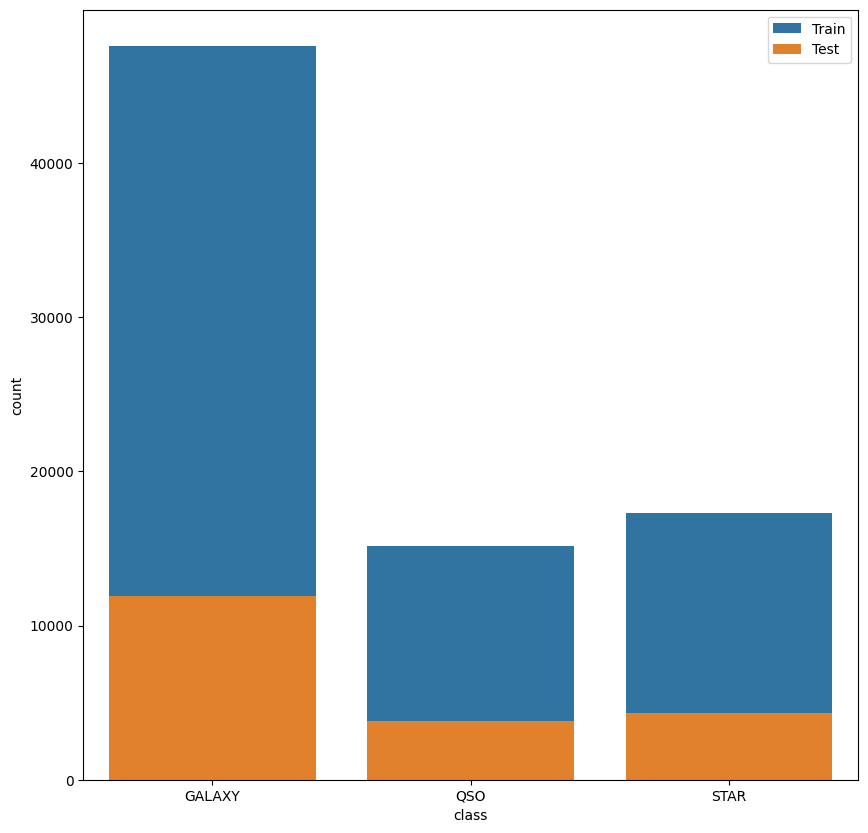

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(train, x="class", label='Train')
sns.countplot(test, x="class", label='Test')

## 2. Preparación

Primero transformamos de categórica a numérica la variable resultado. Los métodos LabelEncoder y OneHotEncoder son facilitados por sklearn para faciliar la transformación de variable categórica a numérica. Para este caso usaremos OneHotEncoder que convierte los resultados en columnas individuales.

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

onehot_data = ohe.fit_transform(train[['class']])
encoded_df = pd.DataFrame(onehot_data, columns=ohe.get_feature_names_out(['class']), index=train.index)
train_data = pd.concat([train, encoded_df], axis=1)

train_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,...,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
76698,1.237663e+18,239.654675,57.988594,23.43854,22.48096,20.54705,19.35023,18.93828,4011,301,...,47,7.640512e+18,GALAXY,0.641854,6786,56448,563,1.0,0.0,0.0
32503,1.237658e+18,135.362428,40.418283,25.44728,21.21599,19.37399,18.67427,18.23364,2830,301,...,183,5.184949e+18,GALAXY,0.417625,4605,55971,656,1.0,0.0,0.0
67291,1.237665e+18,214.568411,34.240351,22.04157,21.41277,21.42779,21.02406,21.01035,4470,301,...,177,4.344962e+18,QSO,0.809839,3859,55246,414,0.0,1.0,0.0
20037,1.237653e+18,358.840199,14.889016,25.47075,22.45964,20.73108,19.73383,19.35055,1739,301,...,295,6.918925e+18,GALAXY,0.500499,6145,56266,981,1.0,0.0,0.0
68612,1.237651e+18,139.963059,0.835066,22.19558,21.52846,19.59382,18.87168,18.45863,1239,301,...,131,1.412460e+19,GALAXY,0.433492,12545,58930,669,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20205,1.237679e+18,30.821484,1.053446,24.55829,23.68861,23.07850,22.47612,21.87586,7717,301,...,535,1.056787e+19,GALAXY,0.936197,9386,58079,635,1.0,0.0,0.0
20602,1.237679e+18,10.174338,18.153269,21.75065,19.91642,18.83842,18.34924,18.02861,7713,301,...,295,8.543329e+18,GALAXY,0.156161,7588,56903,2,1.0,0.0,0.0
45928,1.237667e+18,131.692129,18.982839,22.47969,22.08741,21.81040,21.82990,21.00431,5071,301,...,118,1.248643e+19,QSO,0.906184,11090,58487,737,0.0,1.0,0.0
28561,1.237680e+18,329.784200,22.824827,22.30405,21.42617,21.17934,21.29247,21.52086,8110,301,...,45,8.534438e+18,QSO,2.611505,7580,56955,424,0.0,1.0,0.0


In [ ]:
X_train = train_data.drop(columns=['class_GALAXY', 'class_STAR', 'class_QSO', 'class'])
y_train = train_data[['class_GALAXY', 'class_STAR', 'class_QSO']]


display(X_train)
display(y_train)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
76698,1.237663e+18,239.654675,57.988594,23.43854,22.48096,20.54705,19.35023,18.93828,4011,301,4,47,7.640512e+18,0.641854,6786,56448,563
32503,1.237658e+18,135.362428,40.418283,25.44728,21.21599,19.37399,18.67427,18.23364,2830,301,4,183,5.184949e+18,0.417625,4605,55971,656
67291,1.237665e+18,214.568411,34.240351,22.04157,21.41277,21.42779,21.02406,21.01035,4470,301,5,177,4.344962e+18,0.809839,3859,55246,414
20037,1.237653e+18,358.840199,14.889016,25.47075,22.45964,20.73108,19.73383,19.35055,1739,301,3,295,6.918925e+18,0.500499,6145,56266,981
68612,1.237651e+18,139.963059,0.835066,22.19558,21.52846,19.59382,18.87168,18.45863,1239,301,6,131,1.412460e+19,0.433492,12545,58930,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20205,1.237679e+18,30.821484,1.053446,24.55829,23.68861,23.07850,22.47612,21.87586,7717,301,1,535,1.056787e+19,0.936197,9386,58079,635
20602,1.237679e+18,10.174338,18.153269,21.75065,19.91642,18.83842,18.34924,18.02861,7713,301,5,295,8.543329e+18,0.156161,7588,56903,2
45928,1.237667e+18,131.692129,18.982839,22.47969,22.08741,21.81040,21.82990,21.00431,5071,301,3,118,1.248643e+19,0.906184,11090,58487,737
28561,1.237680e+18,329.784200,22.824827,22.30405,21.42617,21.17934,21.29247,21.52086,8110,301,3,45,8.534438e+18,2.611505,7580,56955,424


,class_GALAXY,class_STAR,class_QSO
76698,1.0,0.0,0.0
32503,1.0,0.0,0.0
67291,0.0,0.0,1.0
20037,1.0,0.0,0.0
68612,1.0,0.0,0.0
...,...,...,...
20205,1.0,0.0,0.0
20602,1.0,0.0,0.0
45928,0.0,0.0,1.0
28561,0.0,0.0,1.0


### **2.1. Pipelines**:

- Los pipelines son una herramienta que nos permite encadenar varias etapas de procesamiento y modelado en una secuencia, facilitando la reproducibilidad y asegurando que todo se ejecute de manera ordenada.
- La libreria sklearn proporciona la clase sklearn.pipeline.Pipeline para poder implementar una secuencia de pasos de procesamiento de datos que se aplican en orden para transformar los datos de entrada en una salida deseada. En el contexto del aprendizaje automático, un pipeline puede incluir pasos como la limpieza de datos, la selección de características, la normalización y la aplicación de un modelo predictivo.

In [ ]:
# 1. Eliminar las columnas 'run_ID', 'obj_ID', 'rerun_ID', 'field_ID', 'fiber_ID' y 'spec_obj_ID' definiendo en una función:
def drop_columns(X):
    return X.drop(['run_ID', 'obj_ID', 'rerun_ID', 'field_ID', 'fiber_ID', 'spec_obj_ID'], axis=1)

drop_transformer = FunctionTransformer(drop_columns)

# 2. Escalar datos con MinMaxScaler
ct = ColumnTransformer(
    transformers=[
       ('scaler', MinMaxScaler(), slice(0, -1))
    ],
    remainder='passthrough'
)

In [ ]:
#Declaramos los pasos y creamos el pipeline
estimators = [
              ('drop_columns', drop_transformer),
              ('preprocessor', ct)
              ]

# Crear el pipeline
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7f1bd6245bd0>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, -1, None))]))])

In [ ]:
pipe.fit(X_train)

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7f1bd6245bd0>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, -1, None))]))])

Y para ver que nuestro Pipeline haya quedado bien construido, realizamos una transformación de nuestros datos.

In [ ]:
pd.DataFrame(pipe.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10
0,0.665703,0.754269,0.999413,0.999091,0.602364,0.435803,0.999018,0.6,0.092836,0.530901,56448.0
1,0.375997,0.581649,0.999613,0.998965,0.536480,0.405987,0.998947,0.6,0.060900,0.353310,55971.0
2,0.596017,0.520953,0.999274,0.998984,0.651831,0.509632,0.999224,0.8,0.116762,0.292566,55246.0
3,0.996779,0.330835,0.999616,0.999089,0.612700,0.452722,0.999059,0.4,0.072704,0.478707,56266.0
4,0.388777,0.192762,0.999289,0.998996,0.548826,0.414695,0.998970,1.0,0.063160,0.999837,58930.0
...,...,...,...,...,...,...,...,...,...,...,...
79995,0.085601,0.194907,0.999525,0.999211,0.744542,0.573680,0.999310,0.0,0.134758,0.742611,58079.0
79996,0.028247,0.362905,0.999245,0.998835,0.506400,0.391651,0.998927,0.8,0.023661,0.596206,56903.0
79997,0.365802,0.371055,0.999317,0.999051,0.673320,0.545176,0.999224,0.4,0.130484,0.881361,58487.0
79998,0.916066,0.408801,0.999300,0.998985,0.637877,0.521471,0.999275,0.4,0.373365,0.595554,56955.0


## 3. Modelamiento


Dado que realizaremos un modelamiento junto a un Pipeline, primero tendremos que definir una función que nos ayudará a construir nuestra Red Neuronal que llamaremos ***get_model***. Par ello utilizamos la libreria [SciKeras](https://www.adriangb.com/scikeras/stable/quickstart.html).

In [ ]:
def get_model(meta, activation, n_layers, hidden_layer_1, hidden_layer_2 = None, hidden_layer_3 = None):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = [hidden_layer_1, hidden_layer_2, hidden_layer_3]

    model = Sequential(name="Red_MLP")
    model.add(Dense(n_features_in_, input_shape=X_shape_[1:]))

    for i in range(n_layers):
        model.add(Dense(dims[i], activation=activation))

    model.add(Dense(3, activation='softmax'))
    return model

In [ ]:
clf = KerasClassifier(
    get_model,
    loss="categorical_crossentropy",
    n_layers=2,
    hidden_layer_1=32,
    hidden_layer_2=16,
    hidden_layer_3=8,
    optimizer="sgd",
    metrics=["accuracy"],
    epochs=10,
    activation="relu"
)

clf

KerasClassifier(
	model=<function get_model at 0x7f1bf346b640>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	n_layers=2
	hidden_layer_1=32
	hidden_layer_2=16
	hidden_layer_3=8
	activation=relu
	class_weight=None
)

In [ ]:
estimators = [
              ('drop_columns', drop_transformer),
              ('preprocessor', ct),
              ('clf', clf),
              ]

pipe = Pipeline(estimators)

Y realizamos el entrenamiento de nuestro modelo

In [ ]:
pipe.fit(X_train, y_train)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5925 - loss: 13050203565631471616.0000
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5948 - loss: 0.9555
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5928 - loss: 0.9574
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5955 - loss: 0.9545
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5955 - loss: 0.9544
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5926 - loss: 0.9576
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5982 - loss: 0.9514
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5961 - loss: 0.9538
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5930 - loss: 0.9570
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5906 - loss: 0.9597


Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7f1bf346b130>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, -1, None))])),
                ('clf',
                 KerasClassifier(activation='relu', epochs=10, hidden_layer_1=32, hidden_layer_2=16, hidden_layer_3=8, loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7f1bf346b640>, n_layers=2, optimizer='sgd'))])

## 4. Evaluación

In [ ]:
y_pred = pipe.predict(X_train)
y_pred

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.75     47556
           1       0.00      0.00      0.00     17275
           2       0.00      0.00      0.00     15169

   micro avg       0.59      0.59      0.59     80000
   macro avg       0.20      0.33      0.25     80000
weighted avg       0.35      0.59      0.44     80000
 samples avg       0.59      0.59      0.59     80000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo base no es muy bueno, vemos que solo hace predicciones para la clase 0 que corresponde a GALAXY.

### **4.1. Búsqueda de Hiperparámetros**

In [ ]:
params = {
    "preprocessor" : ['passthrough', StandardScaler(), MinMaxScaler()],
    "clf__hidden_layer_1": [8, 100, 10, 5],
    "clf__hidden_layer_2": [8, 100, 10, 5],
    "clf__hidden_layer_3": [8, 100, 10, 5],
    "clf__n_layers": [1,2,3],
    "clf__activation": ["relu", "linear", "sigmoid"],
    "clf__optimizer": ["adam", "sgd"],
    "clf__optimizer__learning_rate": [0.0001, 0.001, 0.1],
    "clf__epochs": [10, 30, 20],
}
grid = RandomizedSearchCV(pipe, params, cv=3, scoring='accuracy', n_iter=10, random_state=33)

In [ ]:
grid.fit(X_train, y_train)
#45 minutos

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 748/1667 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5925 - loss: 1.0314

KeyboardInterrupt: 

Podemos visualizar cuales son los hiperparámetros que proporcinan el mejor modelo:

In [ ]:
best_model = grid.best_estimator_

grid.best_params_

{'preprocessor': StandardScaler(),
 'clf__optimizer__learning_rate': 0.1,
 'clf__optimizer': 'sgd',
 'clf__n_layers': 1,
 'clf__hidden_layer_3': 8,
 'clf__hidden_layer_2': 5,
 'clf__hidden_layer_1': 10,
 'clf__epochs': 30,
 'clf__activation': 'relu'}

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor,param_clf__optimizer__learning_rate,param_clf__optimizer,param_clf__n_layers,param_clf__hidden_layer_3,param_clf__hidden_layer_2,param_clf__hidden_layer_1,param_clf__epochs,param_clf__activation,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,50.054001,9.051532,3.080759,0.628888,StandardScaler(),0.0001,sgd,2,8,100,5,10,sigmoid,"{'preprocessor': StandardScaler(), 'clf__optim...",0.596843,0.597780,0.588727,0.594450,0.004065,6
1,42.261779,6.414899,3.530507,1.242442,passthrough,0.0001,sgd,1,100,5,10,10,relu,"{'preprocessor': 'passthrough', 'clf__optimize...",0.596843,0.597780,0.588727,0.594450,0.004065,6
2,107.608393,6.265646,1.618246,0.076800,StandardScaler(),0.1000,sgd,1,8,5,10,30,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.963813,0.928263,0.962912,0.951663,0.016550,1
3,59.067035,19.322728,2.328309,0.466765,MinMaxScaler(),0.0001,adam,3,10,10,8,10,relu,"{'preprocessor': MinMaxScaler(), 'clf__optimiz...",0.924626,0.944613,0.866422,0.911887,0.033168,3
4,103.164230,0.498628,1.962220,0.479135,passthrough,0.0010,sgd,1,100,10,5,30,sigmoid,"{'preprocessor': 'passthrough', 'clf__optimize...",0.596843,0.597780,0.588727,0.594450,0.004065,6
5,96.646871,5.633835,2.604619,0.043682,passthrough,0.0010,adam,3,5,8,8,20,sigmoid,"{'preprocessor': 'passthrough', 'clf__optimize...",0.596843,0.597780,0.588727,0.594450,0.004065,6
6,46.480129,1.874173,2.007739,0.380177,passthrough,0.0010,adam,1,100,8,8,10,relu,"{'preprocessor': 'passthrough', 'clf__optimize...",0.670342,0.597780,0.588727,0.618950,0.036527,5
7,33.685899,1.202914,2.205691,0.447817,StandardScaler(),0.0010,sgd,1,100,8,8,10,linear,"{'preprocessor': StandardScaler(), 'clf__optim...",0.919864,0.924063,0.930098,0.924675,0.004201,2
8,106.222991,5.019074,1.970270,0.475782,StandardScaler(),0.1000,sgd,1,100,8,5,30,linear,"{'preprocessor': StandardScaler(), 'clf__optim...",0.596843,0.956613,0.588727,0.714061,0.171542,4
9,43.522102,3.229318,2.192999,0.421830,passthrough,0.0010,adam,1,5,100,10,10,relu,"{'preprocessor': 'passthrough', 'clf__optimize...",0.596843,0.610905,0.192080,0.466609,0.194206,10


Y realizamos la predicción ya con nuestro mejor modelo encontrado

In [ ]:
y_pred = best_model.predict(X_train)
y_pred

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     47556
           1       0.97      0.97      0.97     17275
           2       0.95      0.92      0.94     15169

   micro avg       0.96      0.96      0.96     80000
   macro avg       0.96      0.96      0.96     80000
weighted avg       0.96      0.96      0.96     80000
 samples avg       0.96      0.96      0.96     80000



### **Evaluación con datos desconocidos**

Y ahora, miraremos cómo le va a nuestro modelo con datos desconocidos. Pero primero, tenemos que prepararlos aplicando los mismos pasos y transformaciones


In [ ]:
onehot_data = ohe.transform(test[['class']])
encoded_df = pd.DataFrame(onehot_data, columns=ohe.get_feature_names_out(['class']), index=test.index)
test_data = pd.concat([test, encoded_df], axis=1)

In [ ]:
X_test = test_data.drop(columns=['class_GALAXY', 'class_STAR', 'class_QSO', 'class'])
y_test = test_data[['class_GALAXY', 'class_STAR', 'class_QSO']]

display(X_test)
display(y_test)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
50519,1.237663e+18,322.844389,0.066155,20.95372,19.10675,17.69282,17.15137,16.81516,4187,301,4,101,1.113592e+18,0.221773,989,52468,280
41497,1.237663e+18,327.432135,0.026756,25.06602,22.34228,21.67905,21.24534,21.33183,4192,301,4,138,5.793943e+18,0.000224,5146,55831,224
52377,1.237662e+18,244.453916,30.328586,22.44228,21.85746,21.72923,21.80132,21.34612,3926,301,6,121,5.637552e+18,-0.000106,5007,55710,622
43711,1.237673e+18,354.611277,7.364446,22.88686,22.99493,21.50769,20.35001,19.58447,6354,301,2,291,1.270823e+19,0.000000,11287,58429,717
80351,1.237666e+18,85.018455,0.357975,23.20248,20.81232,19.33805,17.41481,16.36096,4874,301,4,989,1.401895e+18,0.000085,1245,53770,544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37040,1.237663e+18,329.954208,0.167965,18.46167,18.24839,17.85327,17.69032,17.36323,4192,301,4,155,1.029653e+19,0.270991,9145,58041,626
2901,1.237680e+18,10.291912,26.197645,22.92196,22.26635,20.48679,19.52549,19.01584,8103,301,1,157,7.075417e+18,0.498293,6284,56310,951
18536,1.237680e+18,26.297184,27.235999,20.82563,20.60452,20.41696,20.21507,19.94008,8105,301,1,110,8.657152e+18,2.022906,7689,57743,392
82215,1.237679e+18,23.030530,18.204095,22.49554,22.26613,21.79902,21.85793,21.16835,7913,301,1,103,8.158328e+18,0.685558,7246,56625,209


,class_GALAXY,class_STAR,class_QSO
50519,1.0,0.0,0.0
41497,0.0,1.0,0.0
52377,0.0,1.0,0.0
43711,1.0,0.0,0.0
80351,0.0,1.0,0.0
...,...,...,...
37040,0.0,0.0,1.0
2901,1.0,0.0,0.0
18536,0.0,0.0,1.0
82215,1.0,0.0,0.0


In [ ]:
y_pred = best_model.predict(X_test)
y_pred

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11889
           1       0.97      0.97      0.97      4319
           2       0.95      0.93      0.94      3792

   micro avg       0.96      0.96      0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000
 samples avg       0.96      0.96      0.96     20000



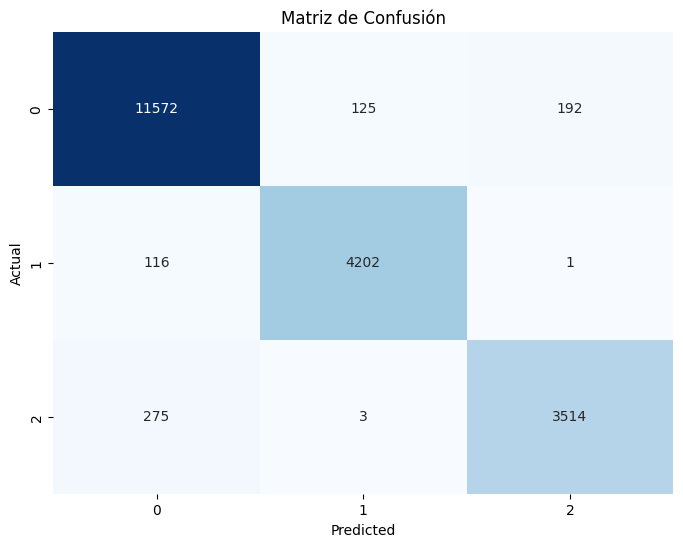

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades a etiquetas de clase

y_test_classes = np.argmax(y_test.values, axis=1) # Convierte y_train de One-Hot a etiquetas (categorías)

cm = confusion_matrix(y_test_classes, y_pred_classes)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(best_model)


Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7f1bf346b130>)),
                ('preprocessor', StandardScaler()),
                ('clf',
                 KerasClassifier(activation='relu', epochs=30, hidden_layer_1=10, hidden_layer_2=5, hidden_layer_3=8, loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7f1bf346b640>, n_layers=1, optimizer='sgd', optimizer__learning_rate=0.1))])
